# GSASII: Reflections API
See: https://gsas-ii.readthedocs.io/en/latest/GSASIIobj.html#powderrefl-table

In [1]:
import G2script as G2
from GSASIIpwd import getPsVoigt
import matplotlib.pyplot as plt
import numpy as np

setting up GSASIIscriptable from /home/edgar/work/g2home
Python gitpython module not installed
GSAS-II binary directory: /home/edgar/work/g2home/bindist


##### Create the project and save it

In [2]:
PROJECT_NAME = 'projects/gsas_reflection.gpx'
gpx = G2.G2Project(newgpx=PROJECT_NAME)
gpx.save()

gpx file saved as /home/edgar/work/gsasii_tutorials/projects/gsas_reflection.gpx


##### Add a phase into the project and simulate Powder Diffraction Data

In [3]:
zno = gpx.add_phase(phasename='zno', phasefile='cif/ZnO.cif')
hist_zno = gpx.add_simulated_powder_histogram(
    histname='hist_zno', 
    iparams='cuka.instprm', 
    phases=[zno], 
    Tmin=0, 
    Tmax=100,
)
gpx.do_refinements()

/home/edgar/work/gsasii_tutorials/cif/ZnO.cif read by Reader CIF
gpx file saved as /home/edgar/work/gsasii_tutorials/projects/gsas_reflection.gpx
Simulating 2500 points from 0 to 100 degrees 2theta
Instrument parameters read: /home/edgar/work/gsasii_tutorials/cuka.instprm (G2 fmt) bank 1
gpx file saved as /home/edgar/work/gsasii_tutorials/projects/gsas_reflection.gpx
 Hessian Levenberg-Marquardt SVD refinement on 1 variables:
initial chi^2 10095 with 2500 obs.
Read from file:/home/edgar/work/gsasii_tutorials/projects/gsas_reflection.bak0.gpx
Save to file  :/home/edgar/work/gsasii_tutorials/projects/gsas_reflection.gpx
GPX file save successful
 Refinement results are in file: /home/edgar/work/gsasii_tutorials/projects/gsas_reflection.lst
 ***** Refinement successful *****


#### Plot the simulated data from the ZnO phase

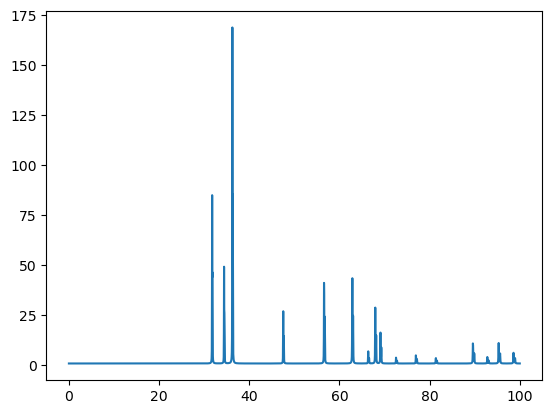

In [4]:
theta_data = hist_zno.getdata('X')
intensity_calculated = hist_zno.getdata('Ycalc')
plt.plot(theta_data, intensity_calculated)
plt.show()

#### We can retrieve an array with the information to generate the reflections

In [5]:
reflections = hist_zno.reflections()['zno']['RefList']

In [6]:
reflections.shape

(16, 15)

#### Each one of the 16 reflections is described by 15 parameters

In [7]:
reflection_0 = reflections[0,:]

##### For example, the Miller index correspond to the first parameters of the array

In [8]:
index = (int(reflection_0[0]), int(reflection_0[1]), int(reflection_0[2]))

##### While, the position (2theta), the gaussian and lorentzian widths are the 5th, 6h and 7th elements, resp.

In [9]:
theta = reflection_0[5]
gaussian_width = reflection_0[6]
lorentz_width = reflection_0[7]

In [10]:
theta_data = np.linspace(20,40,1000)
data_ref_0 = getPsVoigt(
    pos=theta,
    sig=gaussian_width,
    gam=lorentz_width,
    xdata=theta_data,
)[0]

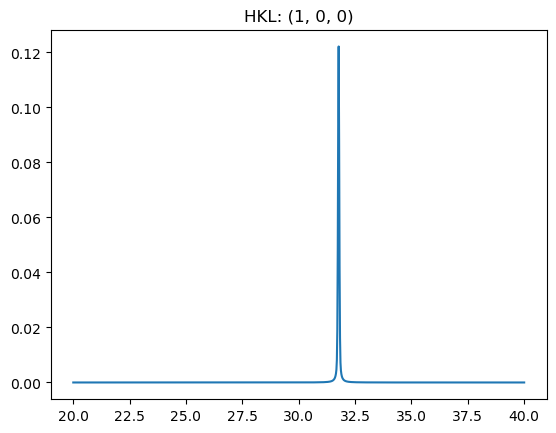

In [11]:
plt.plot(theta_data, data_ref_0)
plt.title(f'HKL: {index}')
plt.show()

#### GenerateReflections: The GSAS-II method to provide a list of peaks from the space group and lattice parameters
https://gsas-ii.readthedocs.io/en/latest/GSASIIscriptable.html#GSASIIscriptable.GenerateReflections

In [12]:
array_list = G2.GenerateReflections(
    spcGrp='P 1',
    cell=(1,2,3,90,90,90),
    Qmax=10,
)

In [13]:
for peak in array_list:
    print(f"Peak ({peak[0]},{peak[1]},{peak[2]}) at Q={peak[3]}")

Peak (0,0,1) at Q=3.0
Peak (0,1,0) at Q=2.0
Peak (0,1,1) at Q=1.6641005886756874
Peak (0,1,-1) at Q=1.6641005886756874
Peak (0,0,2) at Q=1.5
Peak (0,1,2) at Q=1.2
Peak (0,1,-2) at Q=1.2
Peak (0,0,3) at Q=1.0
Peak (0,2,0) at Q=1.0
Peak (1,0,0) at Q=1.0
Peak (0,2,1) at Q=0.9486832980505138
Peak (1,0,1) at Q=0.9486832980505138
Peak (0,2,-1) at Q=0.9486832980505138
Peak (1,0,-1) at Q=0.9486832980505138
Peak (0,1,3) at Q=0.8944271909999159
Peak (1,1,0) at Q=0.8944271909999159
Peak (1,-1,0) at Q=0.8944271909999159
Peak (0,1,-3) at Q=0.8944271909999159
Peak (1,1,1) at Q=0.8571428571428571
Peak (1,-1,1) at Q=0.8571428571428571
Peak (1,1,-1) at Q=0.8571428571428571
Peak (1,-1,-1) at Q=0.8571428571428571
Peak (0,2,2) at Q=0.8320502943378437
Peak (1,0,2) at Q=0.8320502943378437
Peak (0,2,-2) at Q=0.8320502943378437
Peak (1,0,-2) at Q=0.8320502943378437
Peak (1,1,2) at Q=0.7682212795973759
Peak (1,-1,2) at Q=0.7682212795973759
Peak (1,1,-2) at Q=0.7682212795973759
Peak (1,-1,-2) at Q=0.76822127959